# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [126]:
# import libraries here
import pandas as pd
import numpy as np
%matplotlib inline

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [127]:
# your answer here
temp = pd.read_csv('Temp_states.csv')

#### Print `temp`

In [128]:
temp.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [129]:
# using .dtypes method, city column and state column are made of objects, while temperature 
# are made of float numbers
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [130]:
# first we set the State column as index, then loc can be used

In [131]:
temp.set_index('State', inplace=True)

In [132]:
ny = temp.loc['New York']

In [133]:
ny

,City,Temperature
State,,
New York,NYC,19.444444
New York,Albany,9.444444
New York,Buffalo,3.333333


#### What is the average of the temperature of cities in New York?

In [134]:
# we could use describe or use .mean() method
ny.describe()

,Temperature
count,3.000000
mean,10.740741
std,8.133404
min,3.333333
25%,6.388889
50%,9.444444
75%,14.444444
max,19.444444


In [135]:
mean_ny = ny['Temperature'].mean()
print(mean_ny)

10.74074074074074


#### We want to know cities and states with Temperature above 15 degress Celcius

In [136]:
temp

,City,Temperature
State,,
New York,NYC,19.444444
New York,Albany,9.444444
New York,Buffalo,3.333333
Connecticut,Hartford,17.222222
Connecticut,Bridgeport,14.444444
New Jersey,Treton,22.222222
New Jersey,Newark,20.000000


In [137]:
result = temp.loc[temp['Temperature']>15,['City','Temperature']]
result

,City,Temperature
State,,
New York,NYC,19.444444
Connecticut,Hartford,17.222222
New Jersey,Treton,22.222222
New Jersey,Newark,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [138]:
temp.reset_index(inplace=True)
temp

,State,City,Temperature
0,New York,NYC,19.444444
1,New York,Albany,9.444444
2,New York,Buffalo,3.333333
3,Connecticut,Hartford,17.222222
4,Connecticut,Bridgeport,14.444444
5,New Jersey,Treton,22.222222
6,New Jersey,Newark,20.000000


In [139]:
result2 = temp.loc[temp['Temperature']>15,['City','Temperature']]
result2

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [140]:
result2 = temp.loc[(temp['Temperature']>15) & (temp['Temperature']<20),['City','Temperature']]
result2

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [141]:
temp

,State,City,Temperature
0,New York,NYC,19.444444
1,New York,Albany,9.444444
2,New York,Buffalo,3.333333
3,Connecticut,Hartford,17.222222
4,Connecticut,Bridgeport,14.444444
5,New Jersey,Treton,22.222222
6,New Jersey,Newark,20.000000


In [142]:
temp_mean = temp.groupby('State').mean()
temp_mean

,Temperature
State,
Connecticut,15.833333
New Jersey,21.111111
New York,10.740741


In [143]:
temp_stdev = temp.groupby('State').std()
temp_stdev

,Temperature
State,
Connecticut,1.964186
New Jersey,1.571348
New York,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [196]:
employee = pd.read_csv('employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [197]:
# your answer here
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset (Years and Salary, 20 buckets). In few words describe these histograms?

array([[<AxesSubplot:title={'center':'Years'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

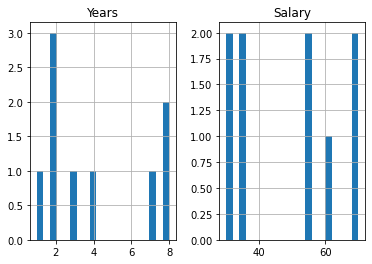

In [198]:
employee.hist(bins = 20)

#### What's the average salary in this company?

In [199]:
round(employee['Salary'].mean(),2)

48.89

#### What's the highest salary?

In [200]:
round(employee['Salary'].max(),2)

70

#### What's the lowest salary?

In [201]:
round(employee['Salary'].min(),2)


30

#### Who are the employees with the lowest salary?

In [202]:
employee.loc[employee['Salary'] == round(employee['Salary'].min(),2)]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [203]:
employee.loc[employee['Name'] == 'David']


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [204]:
employee.loc[employee['Name'] == 'David', 'Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [205]:
employee.loc[employee['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [206]:
employee.head(3)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [207]:
employee.iloc[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [208]:
employee.loc[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [225]:
employee.groupby('Years', as_index=False)['Salary'].mean()


,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


####  What is the average Salary per title?

In [243]:
employee.groupby('Title', as_index=False)['Salary'].mean().rename(columns={'Salary':'mean_salary'})

,Title,mean_salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

In [211]:
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


<AxesSubplot:>

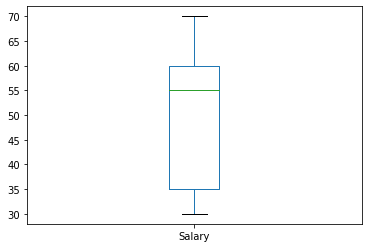

In [213]:
# draw boxplot here
employee['Salary'].plot(kind='box')

In [216]:
# print first quartile here
employee['Salary'].quantile(0.25)

35.0

In [221]:
np.quantile(employee['Salary'],0.49)

53.4

In [215]:
# print third quartile here
employee['Salary'].quantile(.75)

60.0

In [218]:
np.quantile(employee['Salary'],.76)

60.8

#### Is the mean salary per gender different?

In [244]:
employee.groupby('Gender', as_index=False)['Salary'].mean().rename(columns={'Salary':'mean_salary'})

,Gender,mean_salary
0,F,47.5
1,M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [252]:
employee.groupby('Department', as_index=False)['Salary'].min().rename(columns={'Salary':'min_salary'})

,Department,min_salary
0,HR,30
1,IT,30
2,Sales,55


In [253]:
employee.groupby('Department', as_index=False)['Salary'].max().rename(columns={'Salary':'max_salary'})

,Department,max_salary
0,HR,70
1,IT,70
2,Sales,55


In [254]:
employee.groupby('Department', as_index=False)['Salary'].mean().rename(columns={'Salary':'mean_salary'})

,Department,mean_salary
0,HR,45.00
1,IT,48.75
2,Sales,55.00


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [263]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [279]:
differenceList = employee.groupby('Department')['Salary'].agg(['max','min'])
differenceList['diff'] = differenceList['max'] - differenceList['min']
differenceList['diff'] 

Department
HR       40
IT       40
Sales     0
Name: diff, dtype: int64

In [280]:
employee.groupby('Department', as_index=False)['Salary'].apply(lambda x:employee['Salary'].max() - employee['Salary'].min())

,Department,Salary
0,HR,40
1,IT,40
2,Sales,40


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [285]:
orders = pd.read_csv('Orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [287]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [288]:
order.describe()
# the orders are centered around year 2010/2011
# most of the orders are made at the end of the year, 25% alone in december
# each week by wednesday 50% of the orders are made, most orders are before 14pm
# people tend to order several items at the same time
# most people spend in the two digit area
# most orders are around 12/13 pieces
# Unnamed: 0 columns seems to be some sort of InvoiceNo

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [291]:
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [298]:
orders['amount_spent'].mean()

22.39474850474768

#### What were the highest and lowest purchase prices? 

In [300]:
print(orders['amount_spent'].max())
print(orders['amount_spent'].min())

168469.6
0.0


#### Select all the customers we have in Spain

In [305]:
orders.loc[orders['Country']=='Spain']

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [306]:
orders.loc[orders['Country']=='Spain'].value_counts()

Unnamed: 0  InvoiceNo  StockCode  year  month  day  hour  Description                        Quantity  InvoiceDate          UnitPrice  CustomerID  Country  amount_spent
535275      581193     23247      2011  12     3    17    biscuit tin 50's christmas         1         2011-12-07 17:05:00  2.89       17097       Spain    2.89            1
166322      550911     21890      2011  4      4    13    s/6 wooden skittles in cotton bag  6         2011-04-21 13:11:00  3.25       12354       Spain    19.50           1
171225      551398     21700      2011  4      4    13    big doughnut fridge magnets        12        2011-04-28 13:09:00  0.85       12417       Spain    10.20           1
171224      551398     47591D     2011  4      4    13    pink fairy cake childrens apron    8         2011-04-28 13:09:00  1.95       12417       Spain    15.60           1
171223      551398     22138      2011  4      4    13    baking set 9 piece retrospot       3         2011-04-28 13:09:00  4.95       

#### Select all the customers who have bought more than 50 items ?

In [ ]:
# your answer here

#### Select orders from Spain that are above 50 items

In [ ]:
# your answer here

#### Select all free orders

In [ ]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here